## Predict the flower class!


1. Import the dataset iris_dirty.csv from here into a Pandas dataframe. Check the Pandas documentation of read_csv() and use the column names sepal_length, sepal_width, petal_length, petal_width and class when you read in the data.
2. Explore the data with the known Pandas functions head(), info(), describe(), count(), value_counts() (for all columns). Watch for missing values, duplicates, spelling errors, non-uniform units, columns with datatypes they shouldn't have etc.
3. Substitute missing values with the column mean. Check/remove duplicates. Correct possible spelling errors.
4. Bring all columns to centimeter length. Before, transform any column to numeric if necessary.
5. Check for outliers with .describe() or means of plotting. Think about the appropriate way to correct for possible outliers and perform that correction.
6. Plot a correlation matrix with a heatmap between the numeric features.
7. Model the relationship between our features (the four numeric flower metrics) and the label (class) with Logistic Regression using LogisticRegression() from the sklearn.linear_model module. For the purpose of model validation, use the known train-test-split method with a size parameter of 0.3. Calculate the predicted labels, the accuracy score of y_test and y_predicted and plot a confusion matrix of the two.
8. BONUS: Use all the rows of your data and your trained model to predict the flower classes. Then create pairwise scatterplots between all four features (6 in total) in which you color the dots depending which predicted flower class they belong to. Try to make out distinct clusters in those plots.

In [1]:
import numpy as np
import pandas as pd
import datetime
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("iris_dirty.csv", names= ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"])

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,2 mm,Iris-setosa
1,4.9,3.0,1.4,2 mm,Iris-setosa
2,4.7,3.2,1.3,2 mm,Iris-setosa
3,4.6,3.1,1.5,2 mm,Iris-setosa
4,5.0,3.6,1.4,2 mm,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  151 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  151 non-null    float64
 3   petal_width   151 non-null    object 
 4   class         151 non-null    object 
dtypes: float64(3), object(2)
memory usage: 6.0+ KB


In [5]:
for c in df.columns.tolist():         
    print(c, len(df[c].unique()))

sepal_length 36
sepal_width 24
petal_length 43
petal_width 22
class 4


In [6]:
df.count()

sepal_length    151
sepal_width     150
petal_length    151
petal_width     151
class           151
dtype: int64

In [7]:
for c in df.columns.tolist():         
    print(c, (df[c].value_counts()).sum())

sepal_length 151
sepal_width 150
petal_length 151
petal_width 151
class 151


In [8]:
df.describe()

,sepal_length,sepal_width,petal_length
count,151.000000,150.000000,151.000000
mean,6.196689,3.057333,3.764901
std,4.324325,0.432776,1.760197
min,4.300000,2.000000,1.000000
25%,5.100000,2.800000,1.600000
50%,5.800000,3.000000,4.400000
75%,6.400000,3.300000,5.100000
max,58.000000,4.400000,6.900000


In [9]:
# Searching for duplicates
df.duplicated().sum()

3

In [10]:
# Dropping duplicate rows
df = df.drop_duplicates()

In [11]:
df.duplicated().sum()

0

In [12]:
df["class"].unique()

array(['Iris-setosa', 'Iris-setsoa', 'Iris-versicolor', 'Iris-virginica'],
      dtype=object)

In [13]:
# Correcting spelling errors
df['class'].replace({'Iris-setsoa' : 'Iris-setosa'}, inplace=True)

In [14]:
# Extracting "mm" of "petal_with" 
df['petal_width'] = df['petal_width'].str.extract('(\d+)').astype('float64')

In [15]:
# Bringing column "petal_witdh" to centimeters length
df["petal_width"]= df["petal_width"]/10
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica


In [16]:
# Detecting missing values
df.isna().sum()

sepal_length    0
sepal_width     1
petal_length    0
petal_width     0
class           0
dtype: int64

In [17]:
# Subtituting missing values
df['sepal_width'].fillna((df['sepal_width'].mean()), inplace=True)

### Checking for outliers

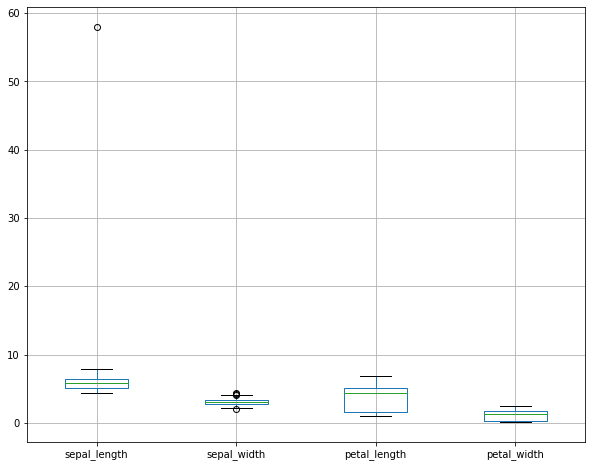

In [18]:
n = df.boxplot(figsize= (10,8))

<AxesSubplot:xlabel='sepal_width'>

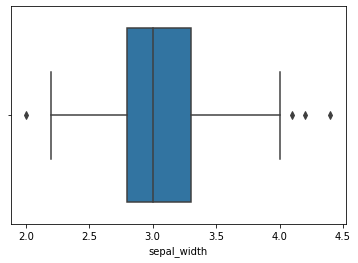

In [19]:
sns.boxplot(x=df['sepal_width'])

In [20]:
# there probably just an error with the decimal, we get rid of the ourlier by dividing the value by 10!
corrected_value = df[df['sepal_length'] >50]['sepal_length']/10

In [34]:
df.loc[143, 'sepal_length'] = float(corrected_value)

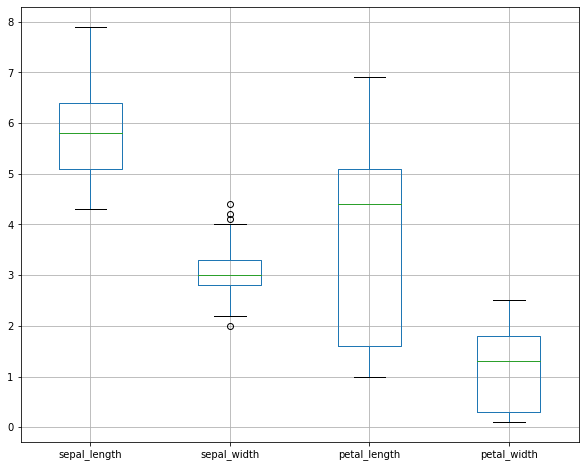

In [35]:
n = df.boxplot(figsize= (10,8))

### Modelling with Logistic Regression

In [36]:
corr_matrix = df.corr()

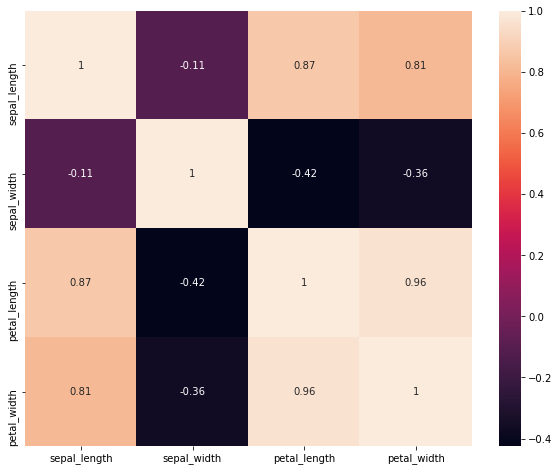

In [37]:
# check for multicollinearity 
corr_matrix=df.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [38]:
# Defining x as the provided data, everything except 'class', which we want to predict
X = df.drop(columns=['class'])

In [39]:
y = df['class']

### Pre processing

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size= 0.3, random_state=27)

In [42]:
classification = LogisticRegression(random_state=0, solver='lbfgs',max_iter=400,multi_class='ovr').fit(X_train, y_train)

In [43]:
from sklearn.metrics import accuracy_score 
predictions = classification.predict(X_test)

In [44]:
accuracy_score(y_test, predictions)

0.9777777777777777

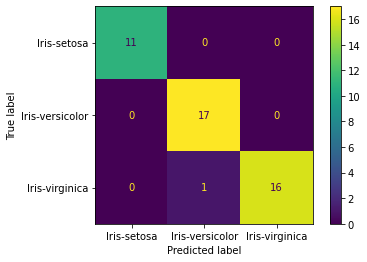

In [45]:
# Confusion matrix 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import plot_confusion_matrix

accuracy_score(y_test,predictions)
confusion_matrix(y_test,predictions)
plot_confusion_matrix(classification, X_test, y_test)
plt.show()

#### BONUS

##### Plotting the data¶

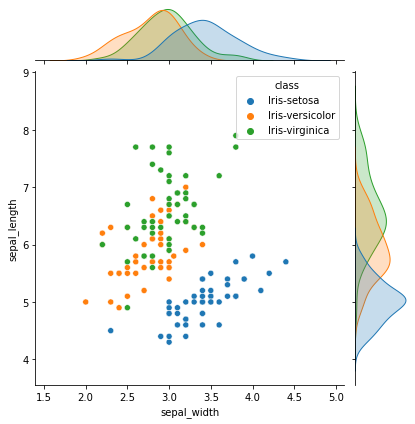

In [48]:
sns.jointplot(data=df, x='sepal_width', y='sepal_length', hue='class');

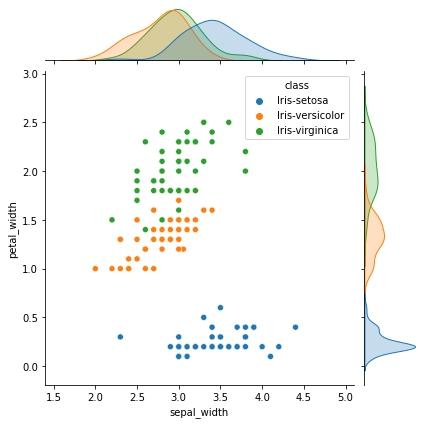

In [53]:
sns.jointplot(data=df, x='sepal_width', y='petal_width', hue='class')

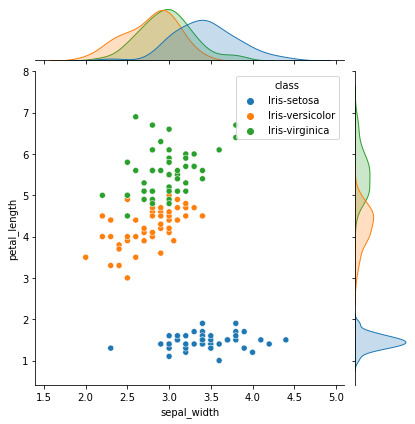

In [54]:
sns.jointplot(data=df, x='sepal_width', y='petal_length', hue='class')

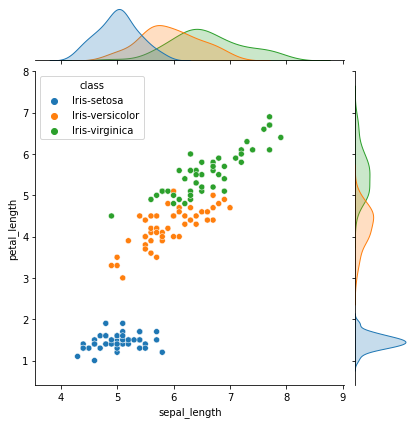

In [55]:
sns.jointplot(data=df, x='sepal_length', y='petal_length', hue='class')

<AxesSubplot:xlabel='petal_width', ylabel='petal_length'>

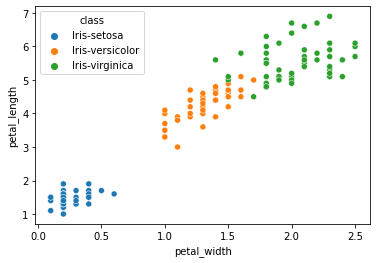

In [50]:
sns.scatterplot(data=df, x="petal_width", y="petal_length", hue="class")

<AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>

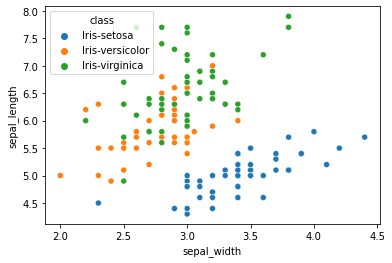

In [49]:
sns.scatterplot(data=df, x="sepal_width", y="sepal_length", hue="class")